In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [25]:
df = pd.read_csv(r"C:\Users\pc\Downloads\car_fuel_efficiency.csv")

df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [33]:
# Size of DataFrame
len(df)

9704

In [26]:
df.info

<bound method DataFrame.info of       engine_displacement  num_cylinders  horsepower  vehicle_weight  \
0                     170            3.0       159.0     3413.433759   
1                     130            5.0        97.0     3149.664934   
2                     170            NaN        78.0     3079.038997   
3                     220            4.0         NaN     2542.392402   
4                     210            1.0       140.0     3460.870990   
...                   ...            ...         ...             ...   
9699                  140            5.0       164.0     2981.107371   
9700                  180            NaN       154.0     2439.525729   
9701                  220            2.0       138.0     2583.471318   
9702                  230            4.0       177.0     2905.527390   
9703                  270            3.0       140.0     2908.043477   

      acceleration  model_year  origin fuel_type         drivetrain  \
0             17.7        2003  

In [27]:
# Select only the desired columns
selected_columns = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]

filtered_df = df[selected_columns]

# Preview the result
print(filtered_df.head())


   engine_displacement  horsepower  vehicle_weight  model_year  \
0                  170       159.0     3413.433759        2003   
1                  130        97.0     3149.664934        2007   
2                  170        78.0     3079.038997        2018   
3                  220         NaN     2542.392402        2009   
4                  210       140.0     3460.870990        2009   

   fuel_efficiency_mpg  
0            13.231729  
1            13.688217  
2            14.246341  
3            16.912736  
4            12.488369  


## EDA

In [28]:
# Look at the fuel_efficiency_mpg variable. Does it have a long tail?
# Visualizing the fuel_efficiency_mpg column by looking at its distribution
import matplotlib.pyplot as plt
import seaborn as sns

# assure that plots are displayed in jupyter notebook's cells
%matplotlib inline

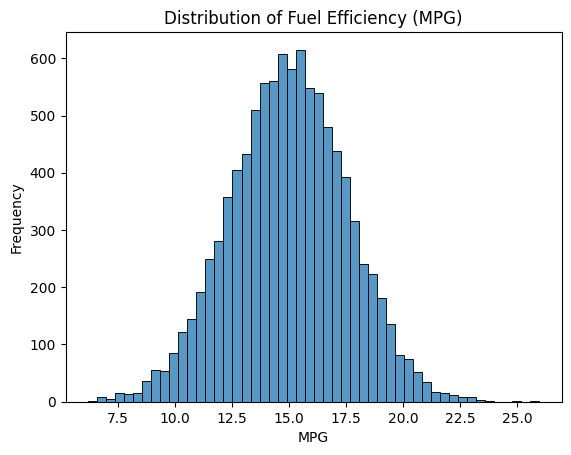

In [29]:
sns.histplot(df.fuel_efficiency_mpg, bins=50) #show the histogram of a series
plt.title('Distribution of Fuel Efficiency (MPG)')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

From the visualization above,we can see that the fuel_efficiency_mpg column does not have long tail.
But instead a bell shape suggesting a normal distribution which is good for model. mean=median=mode

In [30]:
# Q1. There's one column with missing values. What is it?

selected_columns = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]

# Count missing values in each selected column
missing_counts = df[selected_columns].isnull().sum()
print(missing_counts)

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64


In [42]:
# Mean
mean_hp = df['horsepower'].mean()
print("Mean horsepower:", mean_hp)

Mean horsepower: 149.6572921298355


In [41]:
# Median
median_value = df['horsepower'].median()
print("Median horsepower:", median_value)

Median horsepower: 149.65729212983547


In [39]:
# Mode
mode_value = df['horsepower'].mode()
print("Median horsepower:", mode_value)

Median horsepower: 0    149.657292
Name: horsepower, dtype: float64


In [43]:
# Question 2. Median for horse power 

median_hp = df['horsepower'].median()
print("Median horsepower:", median_hp)

Median horsepower: 149.65729212983547


In [35]:
df['horsepower'].isnull().sum()

np.int64(0)

In [36]:
print("Mean horsepower used for filling:", df['horsepower'].mean())

Mean horsepower used for filling: 149.6572921298355


In [63]:
# df['horsepower'] = df['horsepower'].fillna(0)
print("filling horsepower with 0:", df['horsepower'].fillna(0))

filling horsepower with 0: 0       159.000000
1        97.000000
2        78.000000
3       149.657292
4       140.000000
           ...    
9699    164.000000
9700    154.000000
9701    138.000000
9702    177.000000
9703    140.000000
Name: horsepower, Length: 9704, dtype: float64


In [44]:
# Question 3. Filling NAs



## Prepare and split the dataset

Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.

## Setting up the validation framework


In [45]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [46]:
n

9704

In [49]:
n, n_test, n_val, n_train

(9704, 1940, 1940, 5824)

In [51]:
df.loc[[10, 0, 3, 5], selected_columns]

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
10,230,100.000000,3111.810181,2014,13.386605
0,170,159.000000,3413.433759,2003,13.231729
3,220,149.657292,2542.392402,2009,16.912736
5,190,149.657292,2484.883986,2008,17.271818


In [52]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [53]:
idx = np.arange(n)


In [54]:
np.random.seed(42)
np.random.shuffle(idx)

In [56]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [57]:
df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
483,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0,16.642943
7506,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0,16.298377
8795,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0,18.591822
1688,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0,11.818843
6217,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN,19.402209


In [58]:
len(df_train), len(df_val), len(df_test)


(5824, 1940, 1940)

In [59]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [66]:
np.log1p(df_train.horsepower)

0       4.976734
1       4.955827
2       5.049856
3       5.332719
4       4.718499
          ...   
5819    4.941642
5820    4.890349
5821    5.030438
5822    5.043425
5823    5.030438
Name: horsepower, Length: 5824, dtype: float64

In [67]:
np.log1p(df_train.horsepower.values)

array([4.97673374, 4.95582706, 5.04985601, ..., 5.03043792, 5.04342512,
       5.03043792])

In [68]:
# apply log1p transformation to the horsepower column to help the model perform well.
y_train = np.log1p(df_train.horsepower.values)
y_val = np.log1p(df_val.horsepower.values)
y_test = np.log1p(df_test.horsepower.values)

In [102]:
y_val

array([4.72738782, 4.93447393, 5.20400669, ..., 5.31320598, 5.13579844,
       4.77068462])

In [69]:
# We should remove msrp values from dataframes (df_train, df_val, df_test) to make sure that we don’t accidentally use it for training purposes.

del df_train['horsepower']
del df_val['horsepower']
del df_test['horsepower']

In [71]:
len(y_train)

5824

In [72]:
df_train.iloc[10]


engine_displacement                  240
num_cylinders                        2.0
vehicle_weight               2916.987921
acceleration                        16.3
model_year                          2001
origin                              Asia
fuel_type                       Gasoline
drivetrain             Front-wheel drive
num_doors                            1.0
fuel_efficiency_mpg            15.066416
Name: 10, dtype: object

In [73]:
# Using engine_displacement, acceleration, fuel_efficiency_mpg for feature matrix
xi = [240, 16.3, 15.066416]
xi

[240, 16.3, 15.066416]

In [74]:
xi = [240, 16.3, 15.066416]
w0 = 5.17 # bias term
w = [0.01, 0.04, 0.002]

In [76]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [77]:
linear_regression(xi)

8.252132832

In [81]:
# prediction for the horsepower
np.exp(8.252132832)

np.float64(3835.7982163505876)

In [82]:
np.expm1(8.252132832)

np.float64(3834.7982163505876)

In [85]:
np.log1p(3834.7982163505876)

np.float64(8.252132832)

In [86]:
## Linear regression vector form
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res


In [87]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [88]:
w_new = [w0] + w


In [89]:
w_new

[5.17, 0.01, 0.04, 0.002]

In [90]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [91]:
linear_regression(xi)


8.252132832

In [94]:
w0 = 5.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w
w_new

[5.17, 0.01, 0.04, 0.002]

In [95]:
x1  = [1, 148, 12.2, 12.066341]
x2  = [1, 132, 14.3, 13.056432]
x10 = [1, 240, 16.3, 15.066416]

X = [x1, x2, x10]
X = np.array(X)
X

array([[  1.      , 148.      ,  12.2     ,  12.066341],
       [  1.      , 132.      ,  14.3     ,  13.056432],
       [  1.      , 240.      ,  16.3     ,  15.066416]])

In [96]:
# multiplication between the vector and the matrix to get a new prediction 
X.dot(w_new)

array([7.16213268, 7.08811286, 8.25213283])

In [97]:
# implementing linear regression
def linear_regression(X):
    return X.dot(w_new)

In [98]:
linear_regression(X)

array([7.16213268, 7.08811286, 8.25213283])

In [104]:
X = [
    [148, 12.2, 12.066341],
    [148, 12.2, 12.066341],
    [148, 12.2, 12.493883],
    [120, 13.2, 13.066341],
    [148, 12.7, 15.084362],
    [324, 13.9, 13.066341],
    [111, 12.2, 12.045341],
    [102, 18.2, 16.066341],
    [321, 12.2, 11.066341],
]

X = np.array(X)
X

array([[148.      ,  12.2     ,  12.066341],
       [148.      ,  12.2     ,  12.066341],
       [148.      ,  12.2     ,  12.493883],
       [120.      ,  13.2     ,  13.066341],
       [148.      ,  12.7     ,  15.084362],
       [324.      ,  13.9     ,  13.066341],
       [111.      ,  12.2     ,  12.045341],
       [102.      ,  18.2     ,  16.066341],
       [321.      ,  12.2     ,  11.066341]])

In [105]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [108]:
X = np.column_stack([ones, X])


In [109]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]


In [110]:
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)

In [111]:
w0 = w_full[0]
w = w_full[1:]

In [112]:
w0, w


(np.float64(7.395710933581048e+20),
 array([-7.39571093e+20, -5.45774898e+02,  5.59751570e+04, -1.01932030e+05]))

In [119]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.pinv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [121]:
def _raise_linalgerror_singular(err, flag):
    raise LinAlgError("Singular matrix")

In [122]:
train_linear_regression(X, y)

(np.float64(504.9872880365184),
 array([  504.98728804,   504.98728804,    -9.61390261,  2912.62517496,
        -1692.79151316]))

In [123]:

df_train.columns

Index(['engine_displacement', 'num_cylinders', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [125]:
base = ['engine_displacement',
    'acceleration',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [126]:
# missing values
df_train[base].isnull().sum()


engine_displacement      0
acceleration           551
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [131]:
df_train[base] = df_train[base].fillna(df_train[base].mean())
df_train[base].isnull().sum()

engine_displacement    0
acceleration           0
vehicle_weight         0
model_year             0
fuel_efficiency_mpg    0
dtype: int64

In [127]:
df_train[base].fillna(0).isnull().sum()


engine_displacement    0
acceleration           0
vehicle_weight         0
model_year             0
fuel_efficiency_mpg    0
dtype: int64

In [128]:
w0

np.float64(-1.7464568541361096)

In [129]:
w

array([-5.54357501e-05,  3.98825926e-03,  1.00489517e-03,  3.30106507e-04,
        2.01485578e-01])

In [132]:
w0, w = train_linear_regression(X_train, y_train)


In [133]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

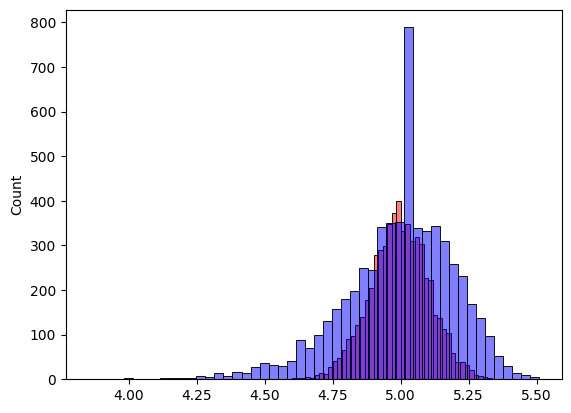

In [134]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [138]:
# Option A: Fill with 0
X_train_0 = df_train[base].fillna(0).values
X_val_0 = df_val[base].fillna(0).values



In [139]:
mean_values = df_train[base].mean()
X_train_mean = df_train[base].fillna(mean_values).values
X_val_mean = df_val[base].fillna(mean_values).values

In [150]:
# RSME: an objective way to evaluate the performance of a regression model.
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [152]:
rmse(y_train, y_pred)


np.float64(0.1686528610978111)

In [153]:
score = np.float64(0.1686528610978111)
rounded_score = round(score, 2)
print(rounded_score)

0.17


In [170]:
rmse_std = round(np.std(score), 2)
print("RMSE Standard Deviation:", rmse_std)


RMSE Standard Deviation: 0.0


In [154]:
# Validating the model
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [155]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.201561293520846)

In [156]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(mean_values)
    X = df_num.values
    return X

In [158]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)


np.float64(0.1692147028821703)

In [ ]:
# Fill missing values using training mean
df_train['horsepower'] = df_train['horsepower'].fillna(mean_hp)
df_val['horsepower'] = df_val['horsepower'].fillna(mean_hp)

In [161]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [167]:
def prepare_X(df):
    df = df.copy()
    
    df['drivetrain'] = 2017 - df['model_year']
    features = base + ['drivetrain']
    
    df_num = df[features]
    df_num = df_num.fillna(mean_values)
    X = df_num.values

    return X

In [168]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.16921470288861934)

In [166]:
df.dtypes


engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object